In [1]:
import cv2 
import matplotlib.pyplot as plt

# Read images

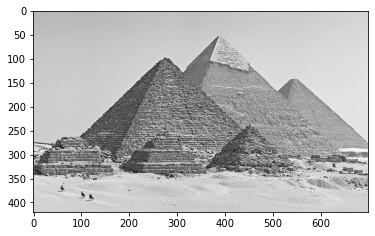

In [2]:
source1 = cv2.imread('kimtuthap1.jpg')  
source2 = cv2.imread('kimtuthap2.jpg') 

source1_gray = cv2.cvtColor(source1, cv2.COLOR_BGR2GRAY)
plt.imshow(source1_gray, cmap="gray")

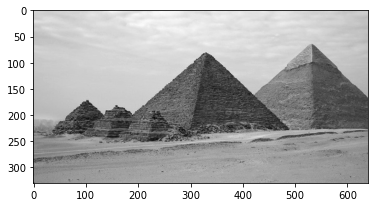

In [3]:
source2_gray = cv2.cvtColor(source2, cv2.COLOR_BGR2GRAY)
plt.imshow(source2_gray, cmap="gray")

# SIFT

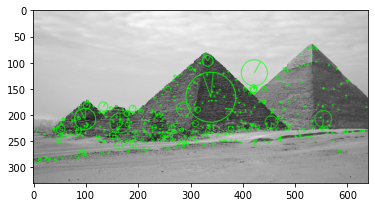

In [4]:
sift = cv2.xfeatures2d.SIFT_create()
source2_sift, des = sift.detectAndCompute(source2_gray, None)

source2_show = cv2.drawKeypoints(source2_gray, source2_sift, None, color=(0, 255, 0),                    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(source2_show[:,:,::-1])

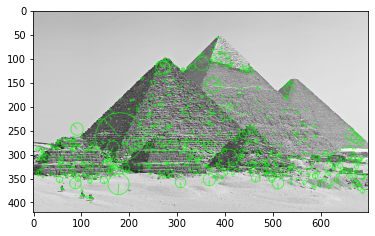

In [5]:
source1_sift, des = sift.detectAndCompute(source1_gray, None)

source1_show = cv2.drawKeypoints(source1_gray, source1_sift, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(source1_show[:,:,::-1])

In [6]:
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(source1_gray,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(source2_gray,None)

len(keypoints_1), len(keypoints_2)

(1194, 585)

# Feature matching

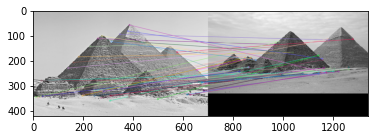

(<matplotlib.image.AxesImage at 0x7fbde9de0278>, None)

In [7]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

output = cv2.drawMatches(source1_gray, keypoints_1, source2_gray, keypoints_2, matches[:50], source2_gray, flags=2)
plt.imshow(output),plt.show()